In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/transaction_anomalies_dataset.csv")
df.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


In [251]:
df.shape

(1000, 12)

In [252]:
df.isnull().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [254]:
df.describe()

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05
50%,1002.118678,3.000000,1000.501902,12.000000,16.000000,41.000000,8.876645e+05
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06


<ipython-input-255-225eb9086186>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Transaction_Amount"])


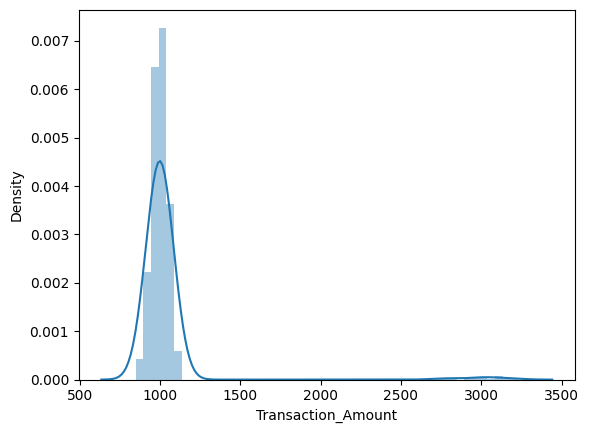

In [255]:
sns.distplot(df["Transaction_Amount"])
plt.show()

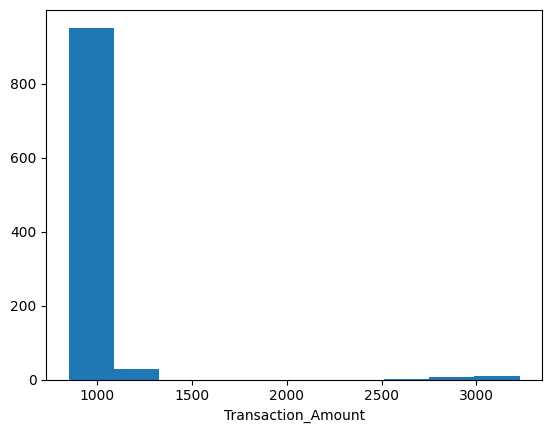

In [256]:
plt.hist(df["Transaction_Amount"])
plt.xlabel("Transaction_Amount")
plt.show()

In [257]:
df.columns

Index(['Transaction_ID', 'Transaction_Amount', 'Transaction_Volume',
       'Average_Transaction_Amount', 'Frequency_of_Transactions',
       'Time_Since_Last_Transaction', 'Day_of_Week', 'Time_of_Day', 'Age',
       'Gender', 'Income', 'Account_Type'],
      dtype='object')

In [258]:
df["Account_Type"].unique()

array(['Savings', 'Current'], dtype=object)

In [259]:
df["Account_Type"].value_counts()

Current    516
Savings    484
Name: Account_Type, dtype: int64

In [260]:
current_acc = df[df["Account_Type"]=="Current"]
saving_acc = df[df["Account_Type"]=="Savings"]

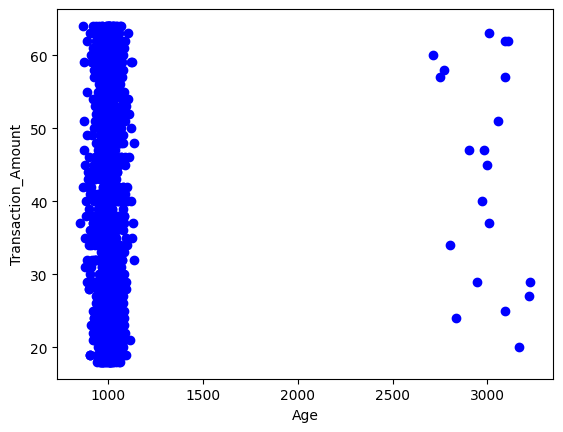

In [261]:
plt.scatter(df["Transaction_Amount"],df["Age"],c='b')
plt.xlabel("Age")
plt.ylabel("Transaction_Amount")
plt.show()

<Axes: >

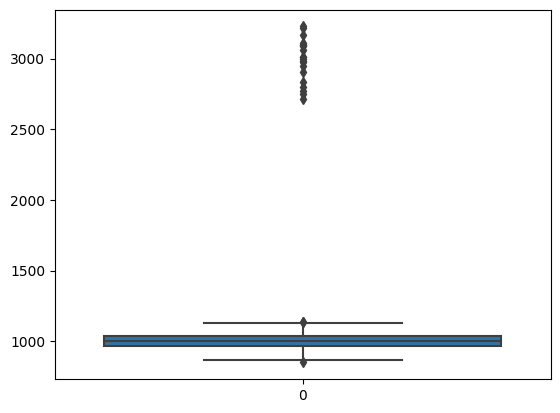

In [262]:
sns.boxplot(df["Transaction_Amount"])

In [263]:
count = df["Day_of_Week"].value_counts().sort_index()
count

Friday       143
Monday       132
Saturday     127
Sunday       145
Thursday     148
Tuesday      157
Wednesday    148
Name: Day_of_Week, dtype: int64

In [264]:
count.values

array([143, 132, 127, 145, 148, 157, 148])

In [265]:
day_names = count.index.tolist()
day_names

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [266]:
df["Day_of_Week"].unique()

array(['Friday', 'Tuesday', 'Sunday', 'Thursday', 'Wednesday', 'Monday',
       'Saturday'], dtype=object)

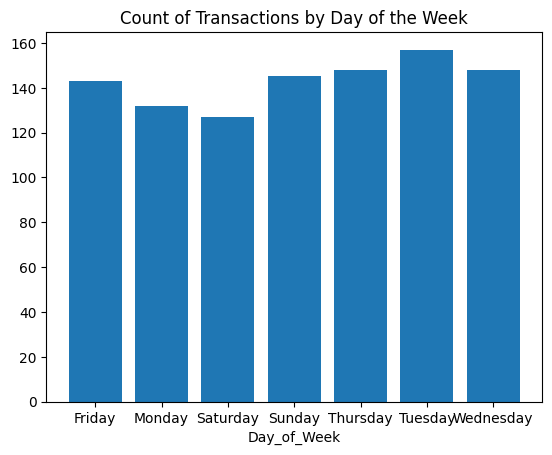

In [267]:
plt.bar(day_names,count.values)
plt.xlabel("Day_of_Week")
plt.title("Count of Transactions by Day of the Week")
plt.show()

In [268]:
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-268-f471181e404f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
Transaction_Amount,1.000000,0.062350,0.010198,-0.043975,0.026767,0.025019,0.023536
Transaction_Volume,0.062350,1.000000,0.003613,0.025198,0.044042,0.029608,0.066288
Average_Transaction_Amount,0.010198,0.003613,1.000000,0.036980,-0.023472,-0.017699,0.037654
Frequency_of_Transactions,-0.043975,0.025198,0.036980,1.000000,-0.005798,-0.033817,-0.018207
Time_Since_Last_Transaction,0.026767,0.044042,-0.023472,-0.005798,1.000000,0.016974,0.054270
Age,0.025019,0.029608,-0.017699,-0.033817,0.016974,1.000000,-0.006031
Income,0.023536,0.066288,0.037654,-0.018207,0.054270,-0.006031,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

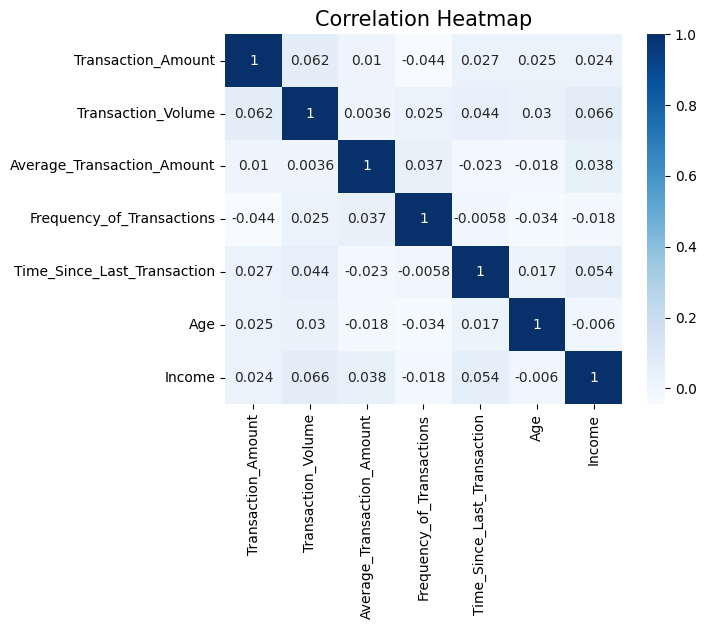

In [269]:
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")
plt.title("Correlation Heatmap",fontsize = 15)

In [270]:
transaction_amount_mean = df["Transaction_Amount"].mean()
transaction_amount_mean

1038.1225107502053

In [271]:
transaction_amount_std = df["Transaction_Amount"].std()
transaction_amount_std

283.58005471535563

In [272]:
anomaly_threshold = transaction_amount_mean + 2 * transaction_amount_std
anomaly_threshold

1605.2826201809166

In [273]:
df["Annomalies"] = df["Transaction_Amount"] > anomaly_threshold

In [274]:
df.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type,Annomalies
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings,False
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings,False
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings,False
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings,False
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings,False


In [275]:
annomalies = df[df["Transaction_Amount"] > anomaly_threshold]
annomalies

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type,Annomalies
59,TX59,2769.890232,3,1007.261392,17,23,Monday,02:00,58,Male,1198320,Current,True
147,TX147,2802.097817,2,995.475096,12,19,Sunday,20:00,34,Female,694966,Savings,True
188,TX188,3094.817415,3,980.424667,6,10,Sunday,11:00,57,Female,1158058,Current,True
230,TX230,2752.637650,4,1020.914703,11,13,Saturday,03:00,57,Male,1460932,Savings,True
246,TX246,3008.497489,4,1010.593855,16,13,Sunday,13:00,37,Male,551537,Current,True
307,TX307,3058.483023,3,984.552604,5,4,Monday,19:00,51,Female,819165,Current,True
422,TX422,3218.959781,1,965.597949,15,23,Sunday,09:00,27,Female,1002495,Current,True
426,TX426,2944.766209,4,990.805385,8,21,Wednesday,16:00,29,Female,973647,Savings,True
474,TX474,2996.004503,3,988.235271,13,8,Thursday,14:00,45,Male,1051731,Current,True
484,TX484,3166.250653,4,1011.935656,18,6,Monday,14:00,20,Female,745093,Current,True


In [276]:
annomalieas_count = annomalies.shape[0]
annomalieas_count

20

In [277]:
total_instances = df.shape[0]
total_instances

1000

In [278]:
annomaly_ratio = annomalieas_count / total_instances
annomaly_ratio

0.02

In [279]:
X = df[["Transaction_Amount","Average_Transaction_Amount","Frequency_of_Transactions"]]
y = df["Annomalies"]
y = pd.get_dummies(y , drop_first = True)

In [293]:
X.iloc[0,:]

Transaction_Amount            1024.835708
Average_Transaction_Amount     997.234714
Frequency_of_Transactions       12.000000
Name: 0, dtype: float64

In [280]:
y.iloc[59,:]

True    1
Name: 59, dtype: uint8

In [281]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [282]:
#we created an Isolation Forest model with a specified contamination parameter of 0.02 (indicating the expected ratio of anomalies) and a random seed for reproducibility

In [283]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.02, random_state=42)
model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.02, random_state=42)

In [284]:
y_pred = model.predict(X_test)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [285]:
y_pred_binary = [ 1 if pred == -1 else 0 for pred in y_pred]
y_pred_binary

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [286]:
y_test

,True
521,0
737,0
740,0
660,0
411,0
...,...
408,0
332,0
208,0
613,0


In [287]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_pred_binary, target_names = ["Normal","Annomaly"])

In [288]:
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
    Annomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
# relevant_features = ["Transaction_Amount","Average_Transaction_Amount","Frequency_of_Transactions"]
# user_inputs = []

# for feature in relevant_features:
#   user_input = float(input(f"Enter the value for '{feature}': "))
#   user_inputs.append(user_input)

In [290]:
#user_df = pd.DataFrame([user_inputs],columns = relevant_features)

In [ ]:
#user_anomaly_pred = model.predict(user_df)

In [ ]:
#user_anomaly_pred_binary = 1 if user_anomaly_pred == -1 else 0

In [ ]:
# if user_anomaly_pred_binary == 1:
#     print("Anomaly detected: This transaction is flagged as an anomaly.")
# else:
#     print("No anomaly detected: This transaction is normal.")